In [1]:
import pandas as pd



# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')

data1 = pd.read_csv('../data/appartements1.csv')
data2 = pd.read_csv('../data/appartements2.csv')
appartements=pd.concat([data1,data2],axis=0,ignore_index=True)
df =appartements.copy()



## Optimisation

In [2]:
from sklearn.model_selection import train_test_split
from preprocessing import Preprocessing 
p =Preprocessing()
X,y,vectorize =p.processing(df)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)


c:\Users\us\Desktop\housePricePrediciton-FInal\processing\preprocessing.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['etat'] =df['etat'].str.lower().str.replace(' ','')
c:\Users\us\Desktop\housePricePrediciton-FInal\processing\preprocessing.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['autre'] =df['autre'].str.lower()
c:\Users\us\Desktop\housePricePrediciton-FInal\processing\preprocessing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

#### Optimisation of RandomForest

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
randomForestRegressor = make_pipeline(RobustScaler(), RandomForestRegressor())


In [9]:
params ={ 'randomforestregressor__max_features': [1,2,3,5,6,7,8,9,10],
 'randomforestregressor__min_samples_leaf': [1,2,3,5,6,7,8,9,10],
 'randomforestregressor__min_samples_split': [1,2,3,5,6,7,8,9,10],
'randomforestregressor__n_estimators': [30,40,60,90,100,110,120,200],
}

grid =GridSearchCV(randomForestRegressor,scoring='r2',param_grid=params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3240 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\us\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 34

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': [1, 2, 3, 5, 6,
                                                                 7, 8, 9, 10],
                         'randomforestregressor__min_samples_leaf': [1, 2, 3, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                         'randomforestregressor__min_samples_split': [1, 2, 3,
                                                                      5, 6, 7,
                                                                      8, 9,
                                                                      10],
                         'randomforestregressor__n_estimators': [30, 40, 60, 90,
                                                                 100, 110, 120,
                                                                 200]},
             scoring='r2')

In [10]:
import math
best_model=grid.best_estimator_
print(best_model.score(X_test,y_test))
y_pred_rans_best =best_model.predict(X_test)
print(f"r2: {r2_score(y_test, y_pred_rans_best)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rans_best)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred_rans_best))}")

0.7009965872143608
r2: 0.7009965872143608
MAE: 279865.2781476803
RMSE: 385717.32896590215


In [11]:
 # store the the best model of randomForest
import pickle
file =open('../Models/randomForest_BEST.pkl','wb')
pickle.dump(grid.best_estimator_,file)

#### Optimisation of GradientBoosting

In [ ]:
grdRegressor = make_pipeline(RobustScaler(), GradientBoostingRegressor(random_state=0))

params ={ 'gradientboostingregressor__learning_rate': [0.04,0.06,0.03],
 'gradientboostingregressor__max_depth': [6,7,8,9,10,11],
'gradientboostingregressor__n_estimators': [200,300,400,500],
}

grid =GridSearchCV(grdRegressor,scoring='r2',param_grid=params,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.04,
                                                                      0.06,
                                                                      0.03],
                         'gradientboostingregressor__max_depth': [6, 7, 8, 9,
                                                                  10, 11],
                         'gradientboostingregressor__n_estimators': [200, 300,
                                                                     400,
                                                                     500]},
             scoring='r2')

In [ ]:
print(grid.best_estimator_.score(X_test,y_test))
y_pred_grd_best =grid.best_estimator_.predict(X_test)
print(mean_absolute_error(y_test, y_pred_grd_best))

0.7899163770532351
223475.77315309452


In [ ]:
grid.best_params_

{'gradientboostingregressor__learning_rate': 0.06,
 'gradientboostingregressor__max_depth': 7,
 'gradientboostingregressor__n_estimators': 400}

In [ ]:
import pickle
file =open('../Models/grdBoosting_BEST_1.pkl','wb')
pickle.dump(grid.best_estimator_,file)

In [12]:
import pickle
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import StackingRegressor
import math


##--- import the best model of randomForest
file =open('../Models/randomForest_BEST.pkl','rb')
best_random_forest=pickle.load(file)
    
##--- import the best model of GradientBoosting
file =open('../Models/grdBoosting_BEST_1.pkl','rb')
best_gradient_boosting=pickle.load(file)


base_regressors = [
    ('random_forest',best_random_forest),
    ('gradient_boosting', best_gradient_boosting),
]
final_estimator = Lasso(alpha=0.7)  # Adjust alpha 

stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=final_estimator
)

# Train the StackingRegressor on the training data
stacking_regressor.fit(X_train, y_train)




StackingRegressor(estimators=[('random_forest',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('randomforestregressor',
                                                RandomForestRegressor(max_features=10,
                                                                      n_estimators=200))])),
                              ('gradient_boosting',
                               Pipeline(steps=[('robustscaler', RobustScaler()),
                                               ('gradientboostingregressor',
                                                GradientBoostingRegressor(learning_rate=0.06,
                                                                          max_depth=7,
                                                                          n_estimators=400,
                                                                          random_state=0))]))],
                  final_estimator=Lasso(alpha=0.7))

In [ ]:
# Make predictions on the test data
predictions = stacking_regressor.predict(X_test)
score= stacking_regressor.score(X_test, y_test)
print(f'R-squared score: {score}')
print(f'MAE: {mean_absolute_error(y_test,predictions)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test,predictions))}')

R-squared score: 0.7926235335127214
MAE: 222452.35128749788
RMSE: 321226.09122340725


In [ ]:
file = open("../Models/Stacking.pkl",'wb')
pickle.dump(stacking_regressor,file=file)

### gradient Boosting prediciton of test data


Text(0.5, 1.0, 'GradientBoosting  prediction of  test data')

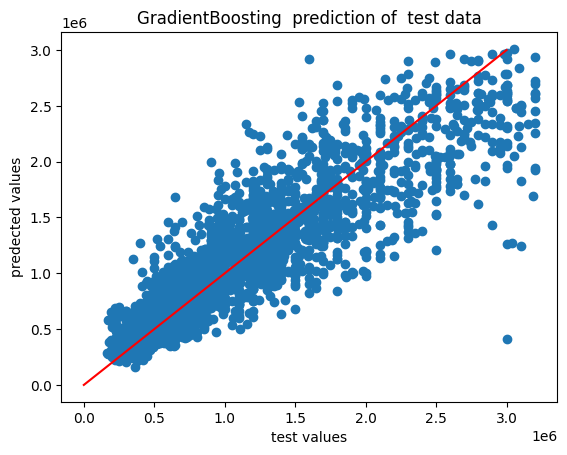

In [5]:
import matplotlib.pyplot as plt

file=open('../Models/grdBoosting_BEST_1.pkl','rb')
best_gradient_boosting=pickle.load(file)
y_pred=best_gradient_boosting.predict(X_test)

x=range(0,3000000)
y=x
plt.plot(x,y,color='r')
plt.scatter(y_test,y_pred)
plt.xlabel('test values')
plt.ylabel('predected values')
plt.title('GradientBoosting  prediction of  test data')

### Random Forest prediciton of test data


Text(0.5, 1.0, 'RandomForest prediction of  test data')

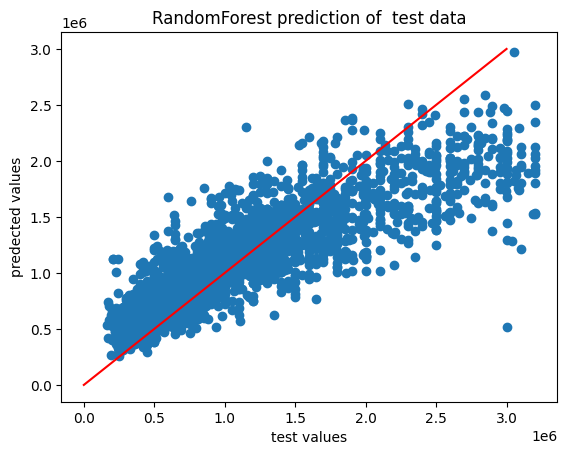

In [13]:
import matplotlib.pyplot as plt
file=open('../Models/randomForest_BEST.pkl','rb')
best_random_forest=pickle.load(file)
y_pred=best_random_forest.predict(X_test)

x=range(0,3000000)
y=x
plt.plot(x,y,color='r')
plt.scatter(y_test,y_pred)
plt.xlabel('test values')
plt.ylabel('predected values')
plt.title('RandomForest prediction of  test data')

### Random Forest prediciton of test data


Text(0.5, 1.0, 'Stacking  prediction of  test data')

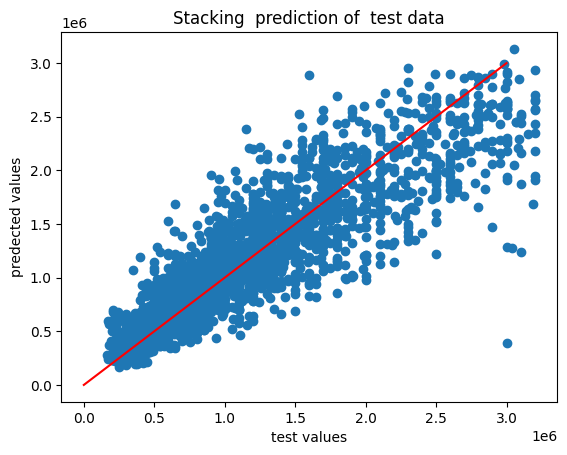

In [ ]:
import matplotlib.pyplot as plt

file=open('../Models/Stacking.pkl','rb')
Stacking=pickle.load(file)
y_pred=Stacking.predict(X_test)

x=range(0,3000000)
y=x
plt.plot(x,y,color='r')
plt.scatter(y_test,y_pred)
plt.xlabel('test values')
plt.ylabel('predected values')
plt.title('Stacking  prediction of  test data')

In [1]:
file=open('../Models/randomForest_BEST.pkl','rb')
